In [1]:
from google.colab import files
uploaded = files.upload()

Saving ecommerce retail.xlsx to ecommerce retail.xlsx


Import pandas, numpy and sales data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

data = pd.read_excel('ecommerce retail.xlsx')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#Correcting datatype
data['CustomerID'] = data['CustomerID'].astype('object')
print(data.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object


In [ ]:
data.dropna(subset=['CustomerID'],inplace = True)
data.isna().any()


InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

In [ ]:
#filter the value >= 0
fdata = data[(data['Quantity'] > 0) & (data['UnitPrice']> 0) & (data['Country']=='United Kingdom')]
fdata = fdata[~fdata['InvoiceNo'].astype(str).str.startswith('C')]
fsdata = fdata.sort_values(by = ['Quantity','UnitPrice'])
fsdata


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405.0,United Kingdom
500313,578757,16216,LETTER SHAPE PENCIL SHARPENER,1,2011-11-25 11:41:00,0.060,12748.0,United Kingdom
...,...,...,...,...,...,...,...,...
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.820,18087.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.720,13135.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.210,12901.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.040,12346.0,United Kingdom


In [ ]:
#Frequency
frequency = fsdata.groupby('CustomerID',as_index = False)['InvoiceNo'].count()
frequency


,CustomerID,InvoiceNo
0,12346.0,1
1,12747.0,103
2,12748.0,4595
3,12749.0,199
4,12820.0,59
...,...,...
3915,18280.0,10
3916,18281.0,7
3917,18282.0,12
3918,18283.0,756


In [ ]:
F_scores = pd.qcut(frequency['InvoiceNo'], 5, labels=['1', '2', '3', '4', '5'])
frequency['F_score'] = F_scores
F_score = frequency[['CustomerID','InvoiceNo','F_score']]
F_score

,CustomerID,InvoiceNo,F_score
0,12346.0,1,1
1,12747.0,103,4
2,12748.0,4595,5
3,12749.0,199,5
4,12820.0,59,4
...,...,...,...
3915,18280.0,10,1
3916,18281.0,7,1
3917,18282.0,12,1
3918,18283.0,756,5


In [ ]:
#latest date
fsdata['rank_date'] = fsdata.groupby('CustomerID')['InvoiceDate'].rank(method ='first',ascending = False)
latest_date = fsdata[fsdata['rank_date']==1]
latest_date


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,rank_date
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,1.0
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405.0,United Kingdom,1.0
497822,578479,17038,PORCELAIN BUDAH INCENSE HOLDER,1,2011-11-24 12:48:00,0.100,15858.0,United Kingdom,1.0
324961,565426,85204,HANGING WOOD AND FELT FLOWER,1,2011-09-04 12:41:00,0.120,12851.0,United Kingdom,1.0
407689,571909,16048,TEATIME ROUND PENCIL SHARPENER,1,2011-10-19 15:08:00,0.120,15006.0,United Kingdom,1.0
...,...,...,...,...,...,...,...,...,...
521375,580363,23582,VINTAGE DOILY JUMBO BAG RED,1500,2011-12-02 16:32:00,1.790,13868.0,United Kingdom,1.0
433788,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.320,16308.0,United Kingdom,1.0
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.720,13135.0,United Kingdom,1.0
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.040,12346.0,United Kingdom,1.0


In [ ]:
latest_date['recency'] = (pd.to_datetime('today').normalize() - latest_date['InvoiceDate']).dt.days
latest_date

<ipython-input-10-8e1d78cfef35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_date['recency'] = (pd.to_datetime('today').normalize() - latest_date['InvoiceDate']).dt.days


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,rank_date,recency
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,1.0,4605
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405.0,United Kingdom,1.0,4604
497822,578479,17038,PORCELAIN BUDAH INCENSE HOLDER,1,2011-11-24 12:48:00,0.100,15858.0,United Kingdom,1.0,4545
324961,565426,85204,HANGING WOOD AND FELT FLOWER,1,2011-09-04 12:41:00,0.120,12851.0,United Kingdom,1.0,4626
407689,571909,16048,TEATIME ROUND PENCIL SHARPENER,1,2011-10-19 15:08:00,0.120,15006.0,United Kingdom,1.0,4581
...,...,...,...,...,...,...,...,...,...,...
521375,580363,23582,VINTAGE DOILY JUMBO BAG RED,1500,2011-12-02 16:32:00,1.790,13868.0,United Kingdom,1.0,4537
433788,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.320,16308.0,United Kingdom,1.0,4567
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.720,13135.0,United Kingdom,1.0,4726
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.040,12346.0,United Kingdom,1.0,4855


In [ ]:
latest_date.loc[:,['R_score']] = pd.qcut(latest_date['recency'],5,labels =['5','4','3','2','1'])
R_score = latest_date[["CustomerID","recency", "R_score"]]
R_score

,CustomerID,recency,R_score
359871,16198.0,4605,2
361741,13405.0,4604,2
497822,15858.0,4545,4
324961,12851.0,4626,2
407689,15006.0,4581,3
...,...,...,...
521375,13868.0,4537,5
433788,16308.0,4567,3
206121,13135.0,4726,1
61619,12346.0,4855,1


In [ ]:
#Monetary
fsdata['total_price'] = fsdata['Quantity']	* fsdata['UnitPrice']
total_price = fsdata.groupby('CustomerID',as_index = False)['total_price'].sum()
total_price

,CustomerID,total_price
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34
...,...,...
3915,18280.0,180.60
3916,18281.0,80.82
3917,18282.0,178.05
3918,18283.0,2094.88


In [ ]:
M_scores = pd.qcut(total_price['total_price'],5,labels = ['1','2','3','4','5'])
total_price['M_score']=M_scores
total_price

,CustomerID,total_price,M_score
0,12346.0,77183.60,5
1,12747.0,4196.01,5
2,12748.0,33719.73,5
3,12749.0,4090.88,5
4,12820.0,942.34,4
...,...,...,...
3915,18280.0,180.60,1
3916,18281.0,80.82,1
3917,18282.0,178.05,1
3918,18283.0,2094.88,5


In [ ]:
#Merge 3 tables
RFM = F_score.merge(R_score,how = 'inner', on = 'CustomerID').merge(total_price,how = 'inner',on = 'CustomerID')
RFM['RFM_score'] = RFM['R_score'].astype(str) + RFM['F_score'].astype(str) + RFM['M_score'].astype(str)
RFM = RFM.rename(columns ={'InvoiceNo' : 'frequency','total_price' : 'monetary'})
RFM['RFM_score'] = RFM['RFM_score'].astype(int)
RFM

,CustomerID,frequency,F_score,recency,R_score,monetary,M_score,RFM_score
0,12346.0,1,1,4855,1,77183.60,5,115
1,12747.0,103,4,4532,5,4196.01,5,545
2,12748.0,4595,5,4530,5,33719.73,5,555
3,12749.0,199,5,4533,5,4090.88,5,555
4,12820.0,59,4,4533,5,942.34,4,544
...,...,...,...,...,...,...,...,...
3915,18280.0,10,1,4807,1,180.60,1,111
3916,18281.0,7,1,4710,1,80.82,1,111
3917,18282.0,12,1,4537,5,178.05,1,511
3918,18283.0,756,5,4533,5,2094.88,5,555


In [ ]:
segmentation = pd.read_excel('ecommerce retail.xlsx',sheet_name=1)
segmentation

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [ ]:
#convert comma separated string to a list of rfm scores
segmentation['RFM Score'] = segmentation['RFM Score'].str.split(',')
#Explore rfm_score column, creating new row for each element in the nested list.
segmentation = segmentation.explode('RFM Score').reset_index(drop=True)
#Convert rfm score into int
segmentation['RFM Score']=segmentation['RFM Score'].astype(int)
segmentation.sort_values(by='RFM Score')
segmentation.head(10)


,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
5,Champions,455
6,Champions,445
7,Loyal,543
8,Loyal,444
9,Loyal,435


In [ ]:
RFM = RFM.merge(segmentation,how = 'left', left_on = 'RFM_score',right_on ='RFM Score')
RFM.sort_values(by = 'CustomerID')


,CustomerID,frequency,F_score,recency,R_score,monetary,M_score,RFM_score,Segment_x,RFM Score_x,Segment_y,RFM Score_y,Segment,RFM Score
0,12346.0,1,1,4855,1,77183.60,5,115,Cannot Lose Them,115,Cannot Lose Them,115,Cannot Lose Them,115
1,12747.0,103,4,4532,5,4196.01,5,545,Champions,545,Champions,545,Champions,545
2,12748.0,4595,5,4530,5,33719.73,5,555,Champions,555,Champions,555,Champions,555
3,12749.0,199,5,4533,5,4090.88,5,555,Champions,555,Champions,555,Champions,555
4,12820.0,59,4,4533,5,942.34,4,544,Champions,544,Champions,544,Champions,544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,18280.0,10,1,4807,1,180.60,1,111,Lost customers,111,Lost customers,111,Lost customers,111
3916,18281.0,7,1,4710,1,80.82,1,111,Lost customers,111,Lost customers,111,Lost customers,111
3917,18282.0,12,1,4537,5,178.05,1,511,New Customers,511,New Customers,511,New Customers,511
3918,18283.0,756,5,4533,5,2094.88,5,555,Champions,555,Champions,555,Champions,555


<ipython-input-34-c6d38ad1019c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM[col])


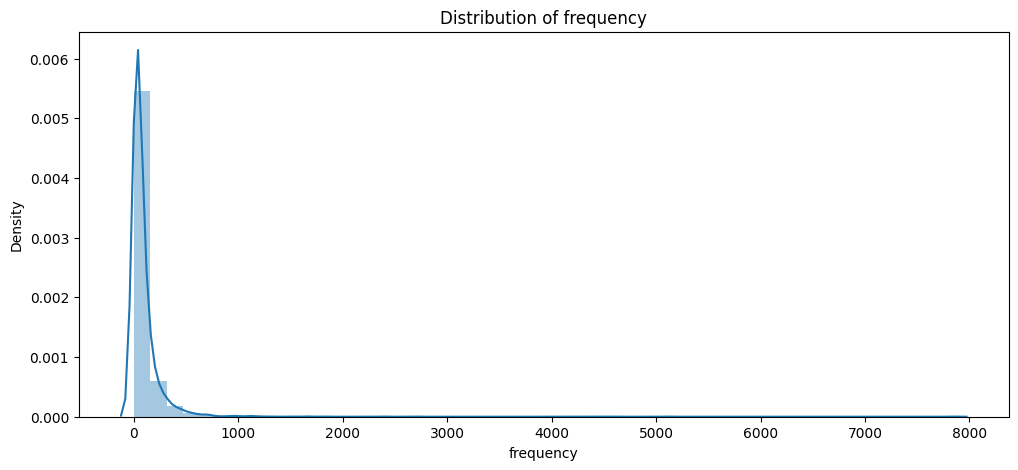

<ipython-input-34-c6d38ad1019c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM[col])


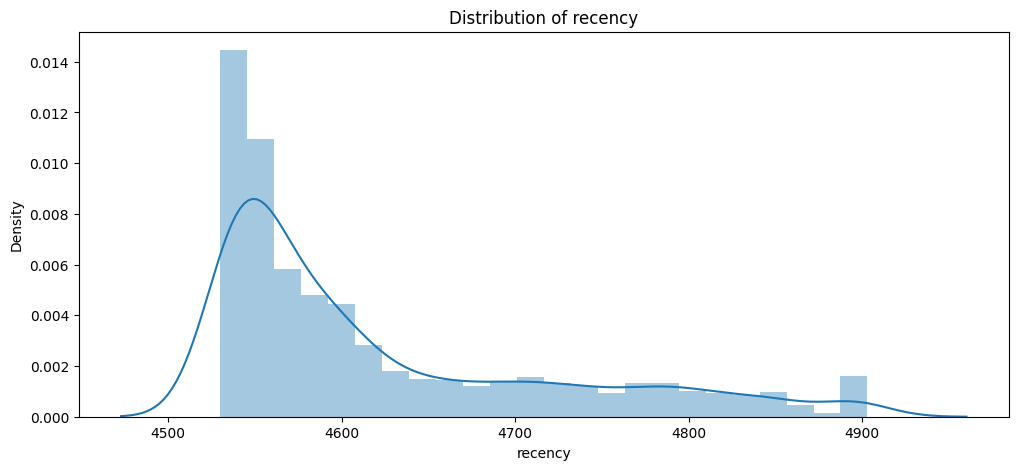

<ipython-input-34-c6d38ad1019c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM[col])


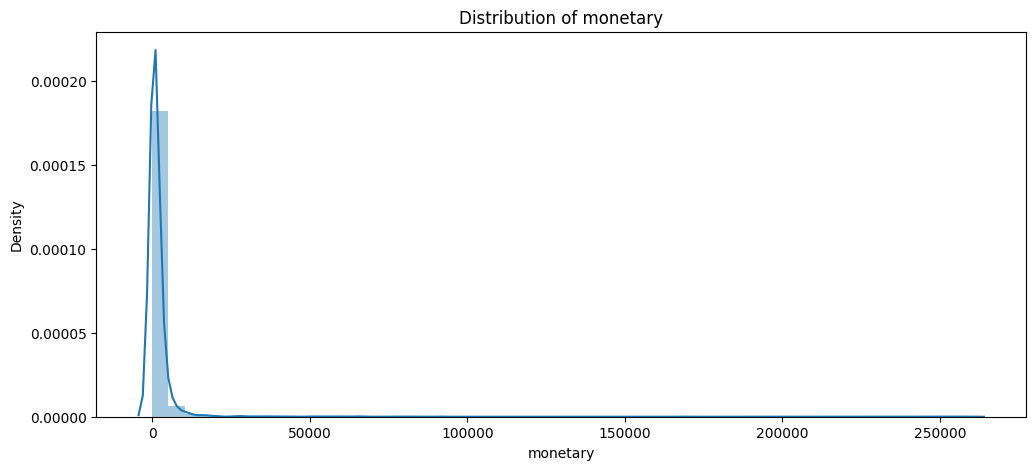

In [ ]:
#Histogram of 3 Score
import matplotlib.pyplot as plt
#custom_ranges = [(-1000, 1000), (4500, 6000), (-5000,10000 )]
colnames = ['frequency','recency','monetary']
for col in colnames:
  fig, ax = plt.subplots(figsize =(12,5))
  sns.distplot(RFM[col])
  #ax.set_xlim(custom_ranges[colnames.index(col)])
  ax.set_title('Distribution of %s' % col)
  plt.show()


In [ ]:
#Prepare data for treemap
group = RFM.groupby('Segment').agg({'CustomerID':'count','monetary':'sum'}).reset_index()
group.columns = ['Segment','cus_count','total_mon']
group

,Segment,cus_count,total_mon
0,About To Sleep,177,51094.590
1,At Risk,386,540595.050
2,Cannot Lose Them,78,276974.461
3,Champions,722,4316473.070
4,Hibernating customers,720,275157.072
5,Lost customers,388,66997.580
6,Loyal,365,840911.460
7,Need Attention,223,313485.500
8,New Customers,271,53592.330
9,Potential Loyalist,460,257298.231


In [ ]:
group['count_share'] = group['cus_count']/group['cus_count'].sum()
group['monetary_share'] = group['total_mon']/group['total_mon'].sum()
group

,Segment,cus_count,total_mon,count_share,monetary_share
0,About To Sleep,177,51094.590,0.045153,0.006991
1,At Risk,386,540595.050,0.098469,0.073969
2,Cannot Lose Them,78,276974.461,0.019898,0.037898
3,Champions,722,4316473.070,0.184184,0.590619
4,Hibernating customers,720,275157.072,0.183673,0.037649
5,Lost customers,388,66997.580,0.098980,0.009167
6,Loyal,365,840911.460,0.093112,0.115061
7,Need Attention,223,313485.500,0.056888,0.042894
8,New Customers,271,53592.330,0.069133,0.007333
9,Potential Loyalist,460,257298.231,0.117347,0.035206


In [ ]:
pip install squarify

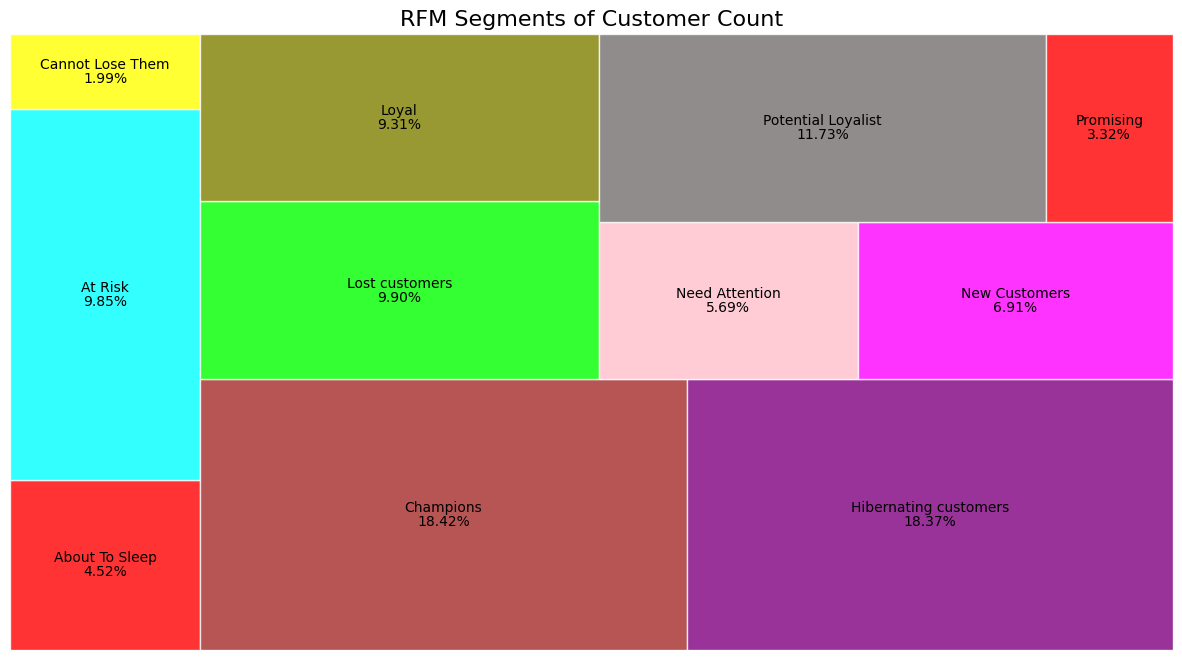

In [ ]:
#tree_map
import squarify
colors =['#FF0000','#00FFFF','#FFFF00','#A52A2A','#800080','#00FF00','#808000','#FFC0CB','#FF00FF','#736F6E']
fig,ax = plt.subplots(1,figsize = (15,8))
squarify.plot(sizes=group['cus_count'],
              label=group['Segment'],
              value=[f'{x*100:.2f}%' for x in group['count_share']],
              alpha=.8,
              color = colors,
              bar_kwargs = dict(linewidth=1, edgecolor="white"))
plt.title('RFM Segments of Customer Count', fontsize=16)
plt.axis('off')
plt.show()

In [ ]:
RFM

,CustomerID,frequency,F_score,recency,R_score,monetary,M_score,RFM_score,Segment_x,RFM Score_x,Segment_y,RFM Score_y,Segment,RFM Score
0,12346.0,1,1,4855,1,77183.60,5,115,Cannot Lose Them,115,Cannot Lose Them,115,Cannot Lose Them,115
1,12747.0,103,4,4532,5,4196.01,5,545,Champions,545,Champions,545,Champions,545
2,12748.0,4595,5,4530,5,33719.73,5,555,Champions,555,Champions,555,Champions,555
3,12749.0,199,5,4533,5,4090.88,5,555,Champions,555,Champions,555,Champions,555
4,12820.0,59,4,4533,5,942.34,4,544,Champions,544,Champions,544,Champions,544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,18280.0,10,1,4807,1,180.60,1,111,Lost customers,111,Lost customers,111,Lost customers,111
3916,18281.0,7,1,4710,1,80.82,1,111,Lost customers,111,Lost customers,111,Lost customers,111
3917,18282.0,12,1,4537,5,178.05,1,511,New Customers,511,New Customers,511,New Customers,511
3918,18283.0,756,5,4533,5,2094.88,5,555,Champions,555,Champions,555,Champions,555


<ipython-input-46-32d6873ffb1f>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(champions[col])


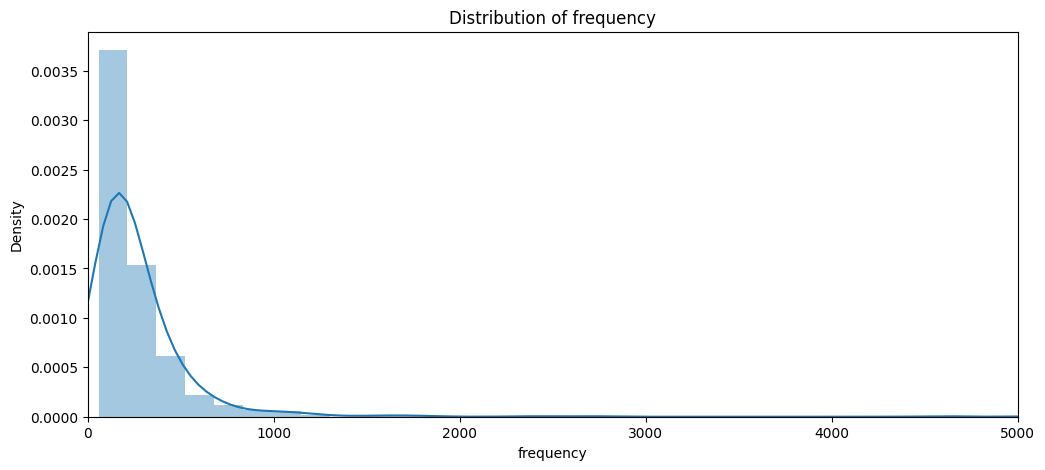

<ipython-input-46-32d6873ffb1f>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(champions[col])


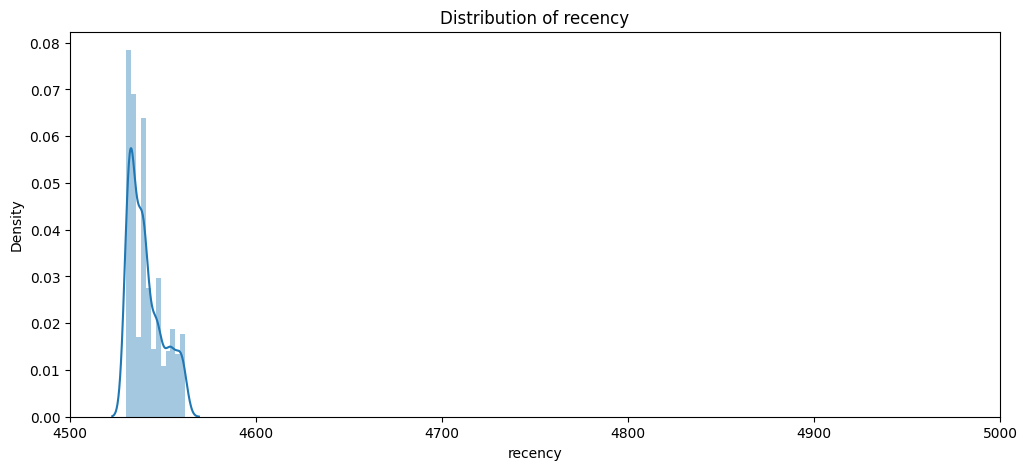

<ipython-input-46-32d6873ffb1f>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(champions[col])


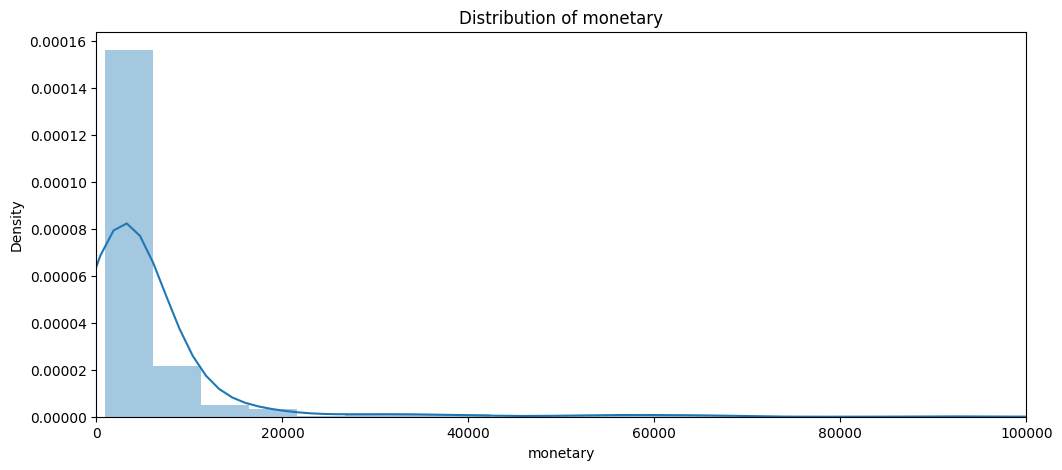

In [ ]:
RFM_date = RFM.merge
champions = RFM[RFM['Segment'] == 'Champions']
Hibernating_customer = RFM[RFM['Segment'] == 'Hibernating customers']
loyal = RFM[RFM['Segment']== 'Loyal']
custom_ranges = [(000, 5000), (4500, 5000), (0,100000 )]
colnames = ['frequency','recency','monetary']
for col in colnames:
  fig, ax = plt.subplots(figsize =(12,5))
  sns.distplot(champions[col])
  ax.set_xlim(custom_ranges[colnames.index(col)])
  ax.set_title('Distribution of %s' % col)
  plt.show()


### Definition and recommended action for each customer segment:

| Segment | Characteristics | Recommendation |
| :-: | :-: | :-: |
| Champions | Bought recently, buy often and spend the most! | Reward them. Can be early adopters for new products. Will promote your brand. |
| Loyal | Spend good money with us often. Responsive to promotions. | Upsell higher value products. Ask for reviews. Engage them. |
| Potential Loyalist | Recent customers, but spent a good amount and bought more than once. | Offer membership / loyalty program, recommend other products. |
| New customers | Bought most recently, but not often. | Provide on-boarding support, give them early success, start building relationship. |
| Promising | Recent shoppers, but haven’t spent much. | Create brand awareness, offer free trials |
| Need attention | Above average recency, frequency and monetary values. May not have bought very recently though. | Make limited time offers, Recommend based on past purchases. Reactivate them. |
| About to sleep | Below average recency, frequency and monetary values. Will lose them if not reactivated. | Share valuable resources, recommend popular products / renewals at discount, reconnect with them. |
| At risk | Spent big money and purchased often. But long time ago. Need to bring them back! | Send personalized emails to reconnect, offer renewals, provide helpful resources. |
| Cannot lose them | Made biggest purchases, and often. But haven’t returned for a long time. | Win them back via renewals or newer products, don’t lose them to competition, talk to them. |
| Hibernating customers | Last purchase was long back, low spenders and low number of orders. | Offer other relevant products and special discounts. Recreate brand value. |
| Lost customers | Lowest recency, frequency and monetary scores. | Revive interest with reach out campaign, ignore otherwise. |

